In [60]:
import tensorflow as tf
import os
from google.colab import drive


In [61]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [62]:
tf.config.list_physical_devices('GPU')

[]

In [63]:
import cv2
import imghdr

In [64]:
data_dir = '/content/drive/MyDrive/data'

In [65]:
image_exts = ['jpeg','jpg','bmp','png']


In [66]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)

      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))


In [67]:
import numpy as np
from matplotlib import pyplot as plt

In [68]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 305 files belonging to 2 classes.


In [69]:
data_iterator = data.as_numpy_iterator()

In [70]:
batch = data_iterator.next()

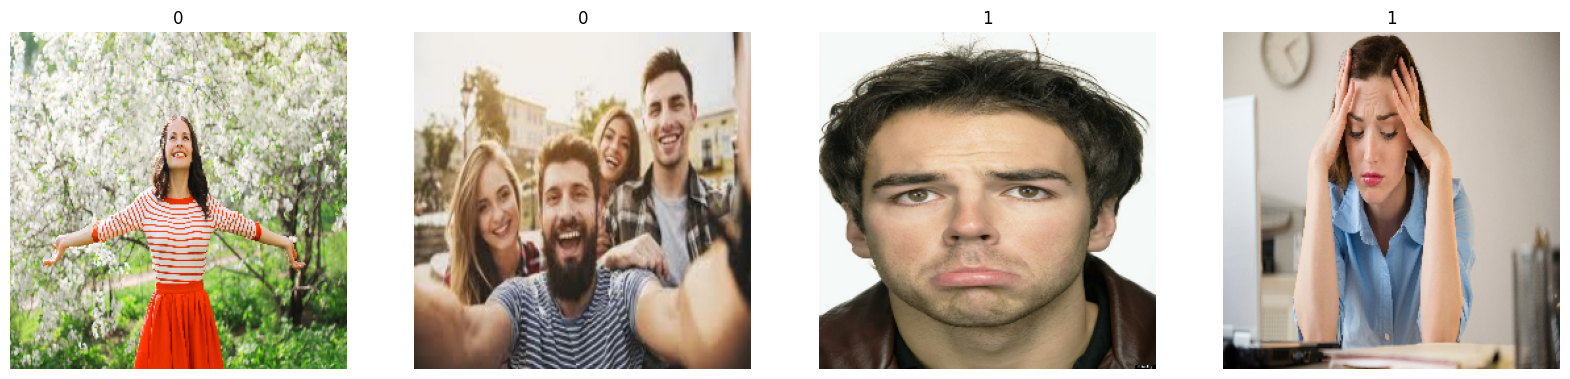

In [71]:

plt.figure(figsize=(20, 20))
for i in range(4):  # Adjust the range as needed
    plt.subplot(1, 4, i+1)
    plt.imshow(batch[0][i].astype('int'))  # Ensure proper image format for display
    plt.title(batch[1][i])  # Set title as label
    plt.axis('off')  # Turn off axis labels
plt.show()

In [72]:
data = data.map(lambda x,y: (x/255,y))

In [73]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [74]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size =int(len(data)*.1)

In [75]:
test_size

1

In [76]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten, Dropout

In [143]:
model = Sequential()

In [144]:
model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [145]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [146]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [147]:

logdir='/content/drive/MyDrive/logs'

In [148]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [149]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
7/7 [==============================] - 50s 6s/step - loss: 0.7994 - accuracy: 0.4911 - val_loss: 0.6860 - val_accuracy: 0.4688
Epoch 2/40
7/7 [==============================] - 44s 6s/step - loss: 0.6429 - accuracy: 0.5670 - val_loss: 0.5776 - val_accuracy: 0.6094
Epoch 3/40
7/7 [==============================] - 47s 6s/step - loss: 0.6075 - accuracy: 0.6384 - val_loss: 0.4947 - val_accuracy: 0.6875
Epoch 4/40
7/7 [==============================] - 46s 6s/step - loss: 0.5900 - accuracy: 0.7098 - val_loss: 0.5121 - val_accuracy: 0.7969
Epoch 5/40
7/7 [==============================] - 43s 6s/step - loss: 0.5168 - accuracy: 0.7321 - val_loss: 0.3677 - val_accuracy: 0.8594
Epoch 6/40
7/7 [==============================] - 53s 7s/step - loss: 0.4351 - accuracy: 0.7902 - val_loss: 0.3685 - val_accuracy: 0.7969
Epoch 7/40
7/7 [==============================] - 43s 6s/step - loss: 0.2970 - accuracy: 0.8571 - val_loss: 0.2172 - val_accuracy: 0.9219
Epoch 8/40
7/7 [==================

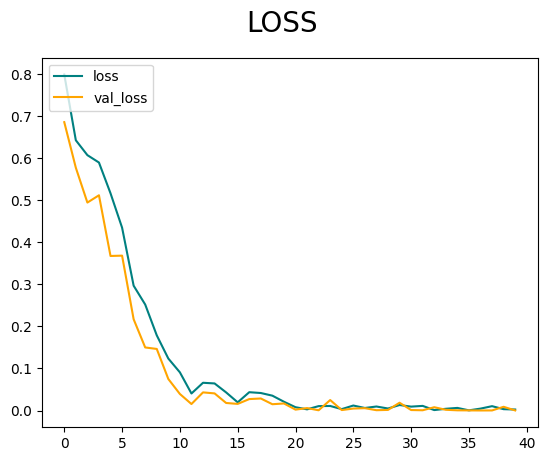

In [150]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle("LOSS" ,fontsize = 20)
plt.legend(loc="upper left")
plt.show()

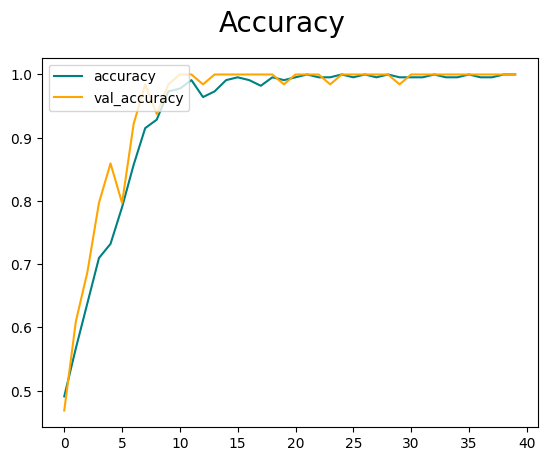

In [152]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [87]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [153]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [154]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 1s 684ms/step


In [155]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.85714287, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


In [156]:
import cv2

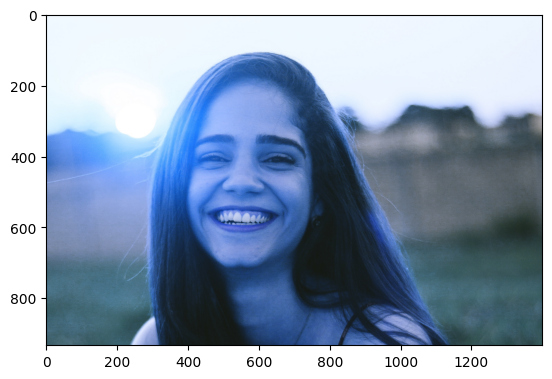

In [157]:
# Display the image using Matplotlib
img = cv2.imread('/content/drive/MyDrive/1HEoLBLidT2u4mhJ0oiDgig.png')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [135]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 61ms/step


In [136]:
yhat

array([[0.9991585]], dtype=float32)

In [137]:
if yhat > 0.5:
    print(f'you are Sad')
else:
    print(f'you are Happy')

you are Sad
